# Question 1 Coverage Analysis

## How long is the reference gene

(base) (19:18:39)~/qbb2021-answers/week1_hw/asm/$samtools faidx ref.fa

mate ref.fa.fai

233806 bp

## Question 1b. How many reads are provided and how long are they?

FastQC frag180.1.fq

FastQC frag180.2.fq

FastQC jump2k.1.fq

FastQC jump2k.2.fq

frag180.1.fq: 35178 reads, 100bp each

frag180.2.fq: 35178 reads, 100bp each

jump2k.1.fq: 70355 reads, 50bp each

jump2k.2.fq: 70355 reads, 50bp each

## How much coverage do you expect to have?

Coverage = (read count * read length ) / total genome size

In [24]:
((35178*100*2) + (70355*50*2))/233806

60.182801125719614

## Question 1d. Plot the average quality value across the length of the reads

### frag180.1.fq

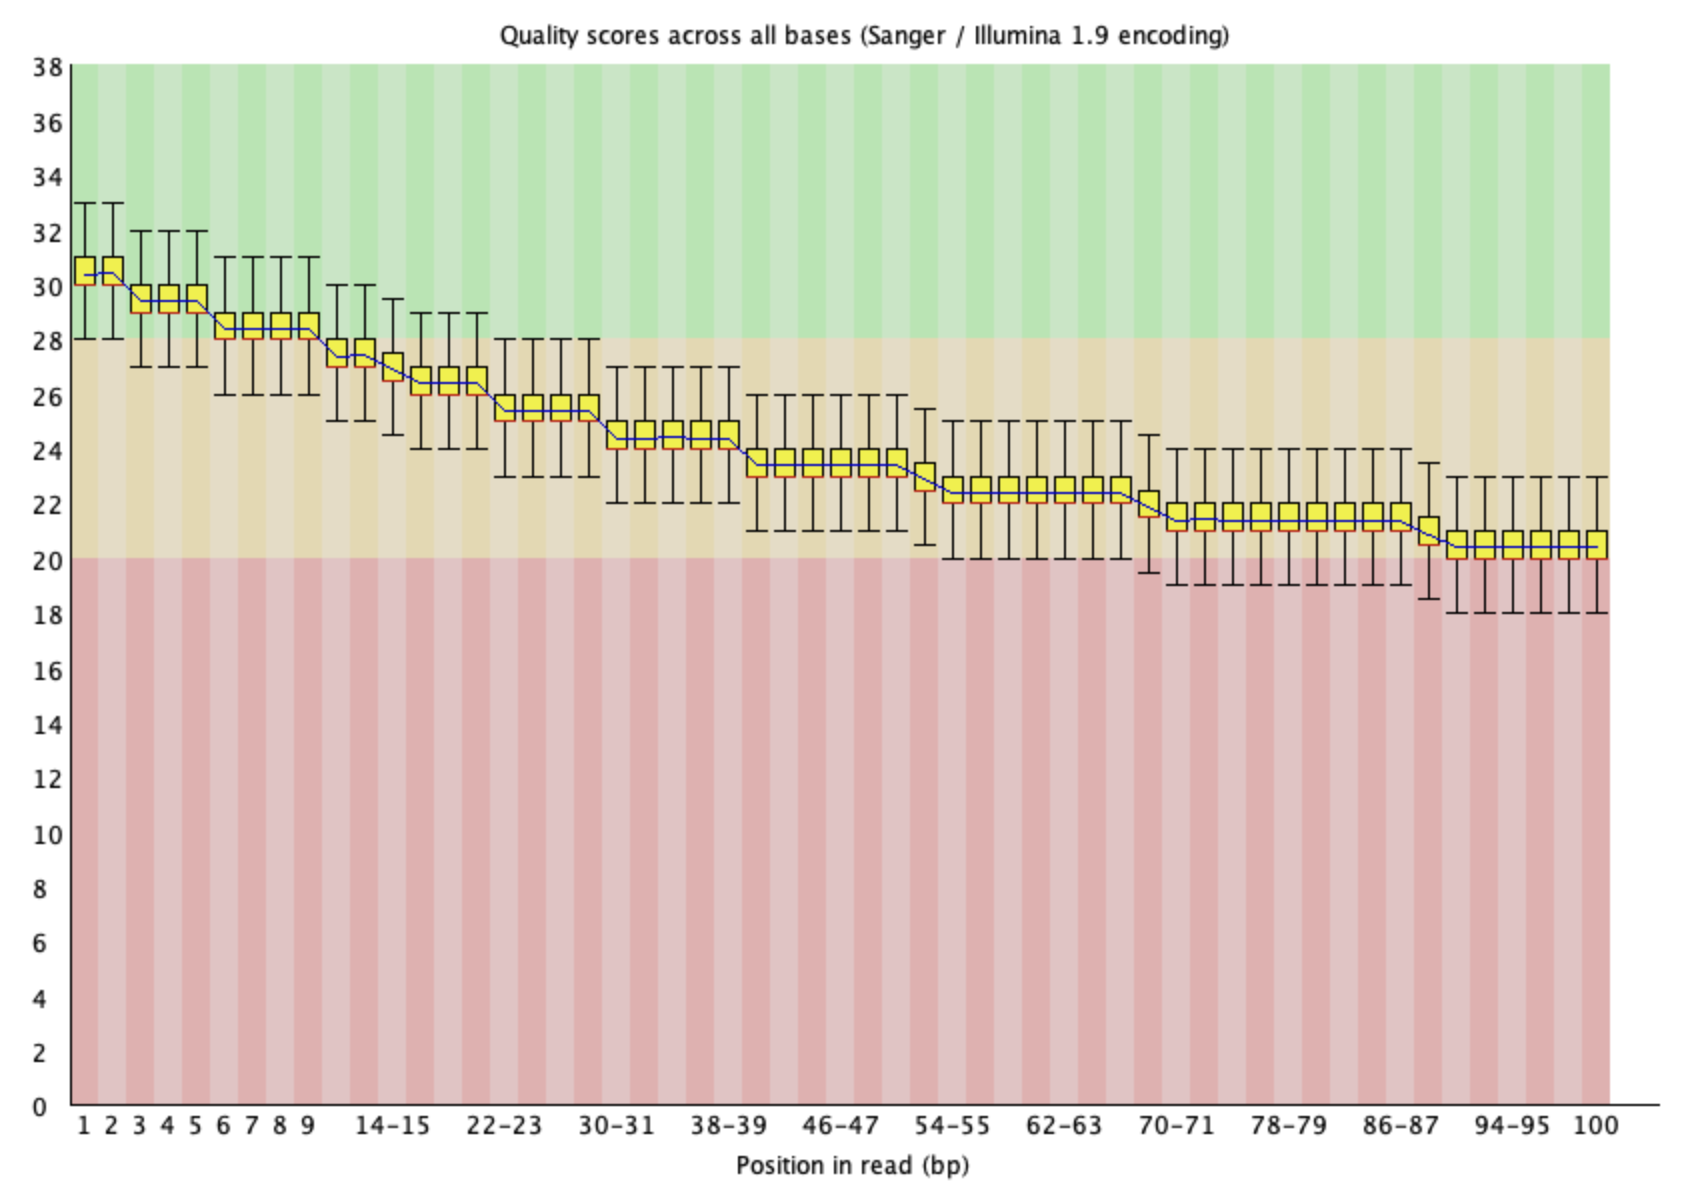

### frag180.2.fq

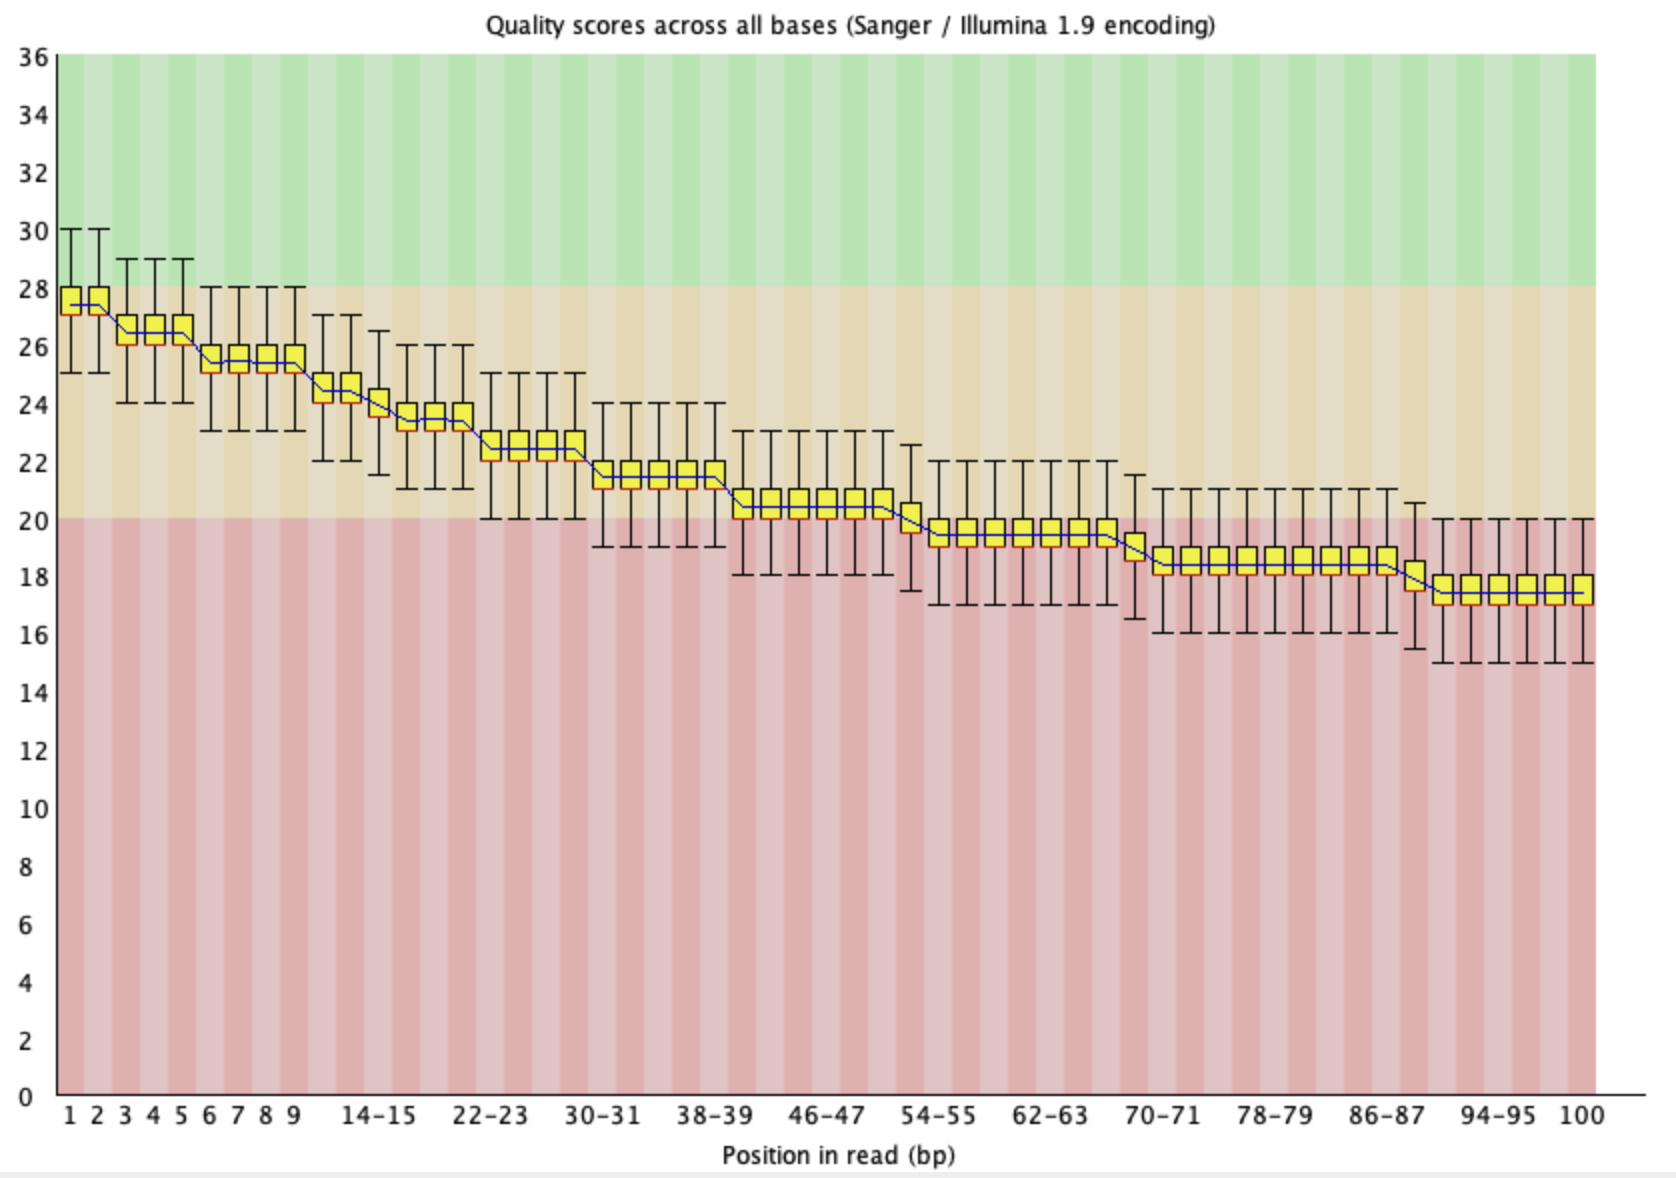

### jump2k.1.fq

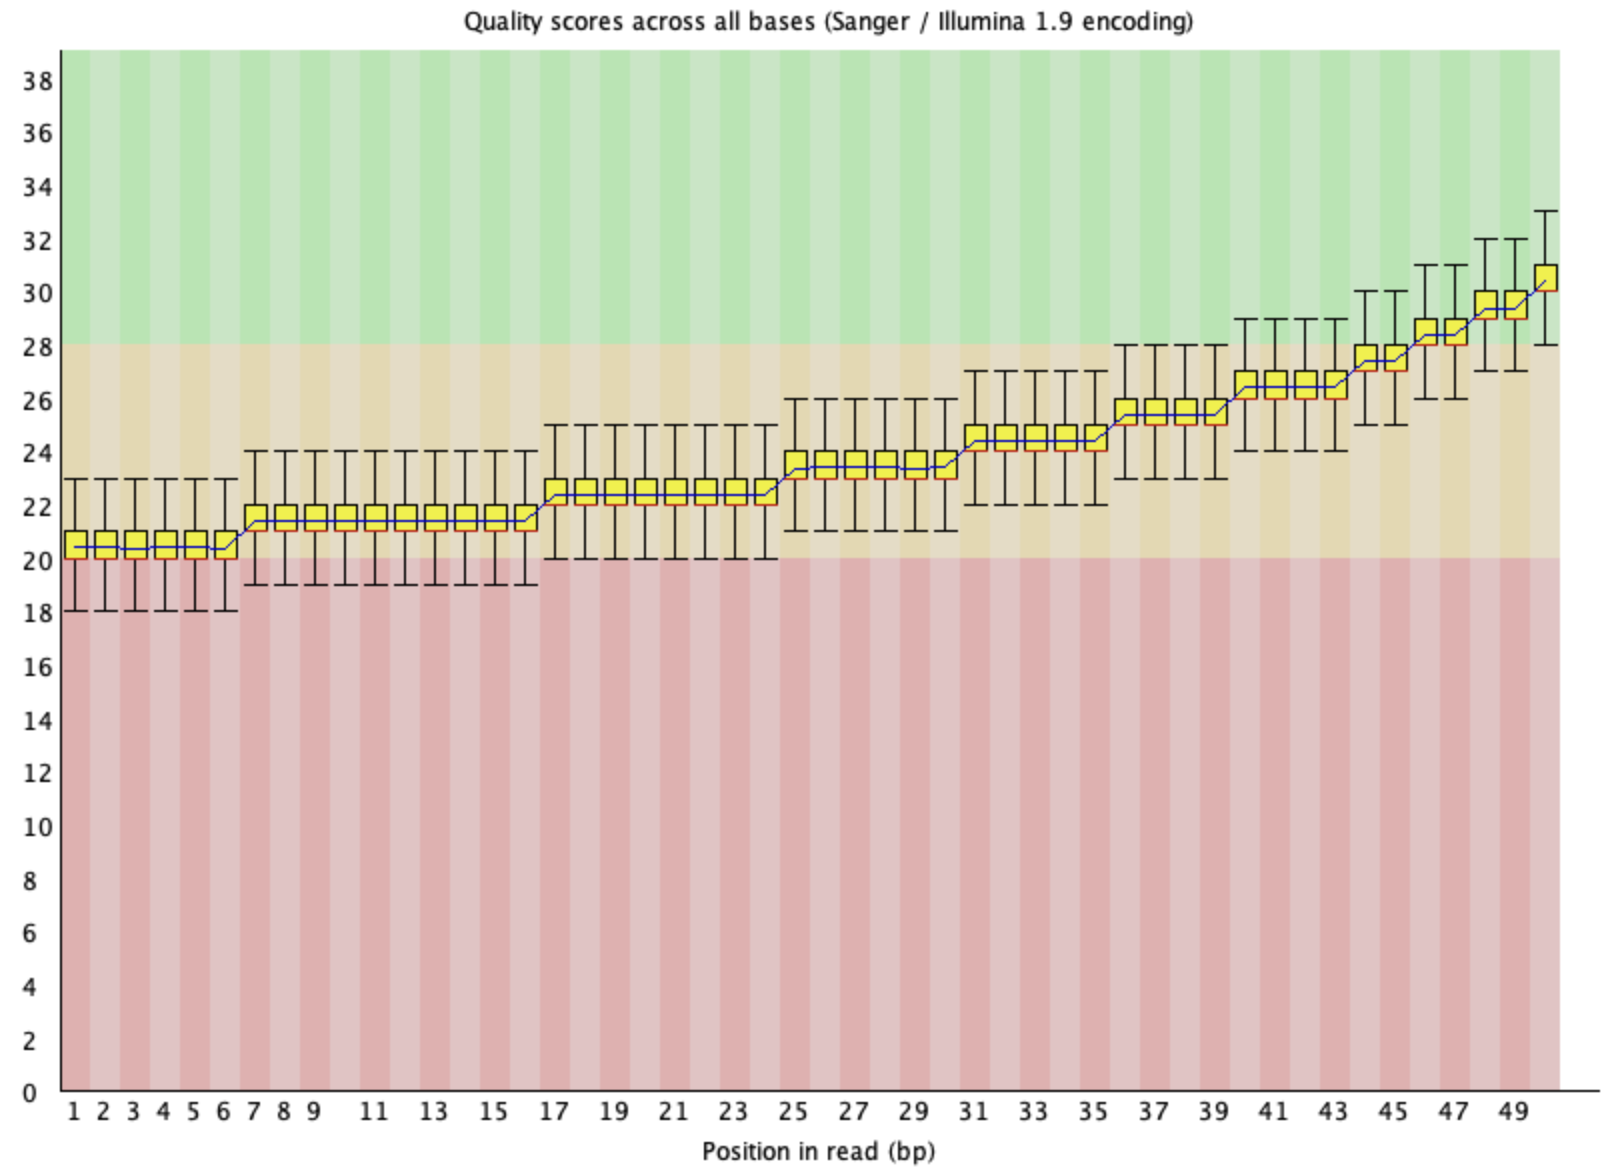

### jump2k.2.fq

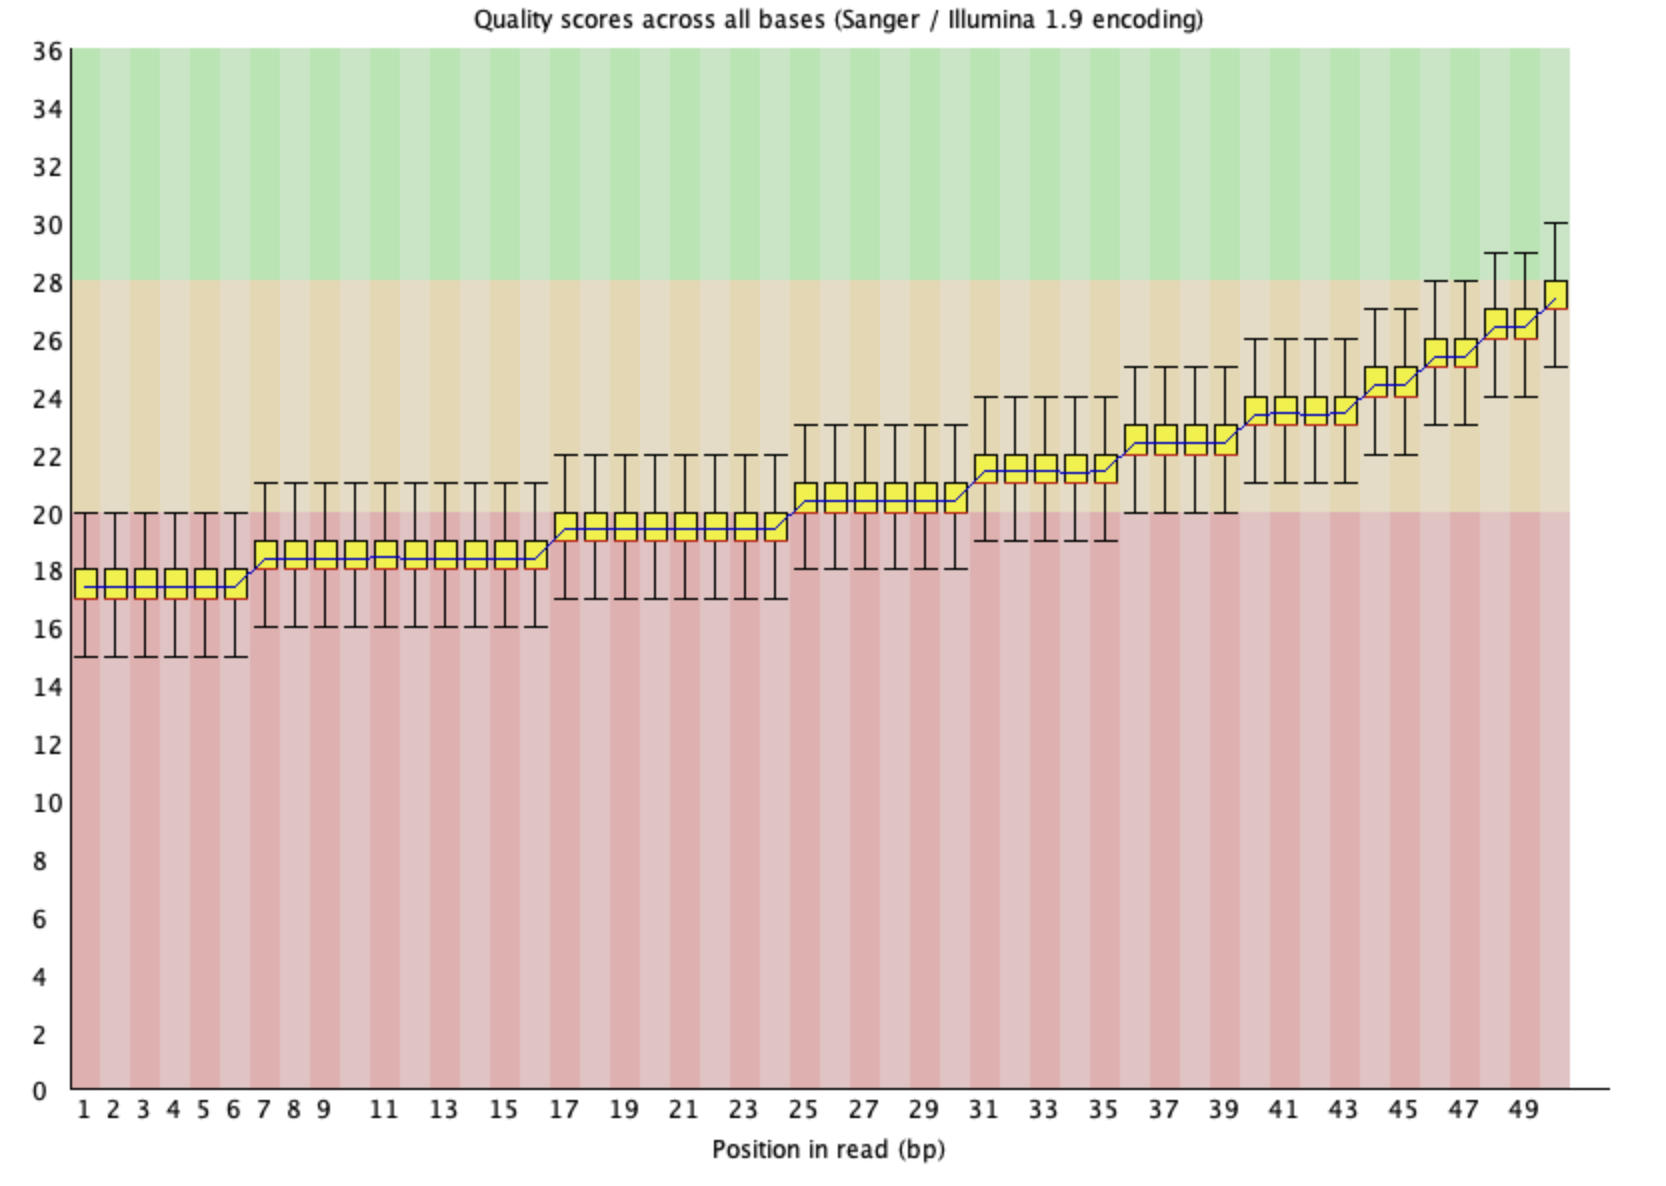

## How many kmers occur exactly 50 times?

$ jellyfish count -m 21 -C -s 1000000 asm/*.fq
$ jellyfish histo mer_counts.jf > reads.histo
$ mate reads.histo

1030 kmers

## WHat are the top 10 most frequently occuring kmers?

$ jellyfish dump mer_counts.jf | sort -r | head -n 10 > 1.txt

$ mate 1.txt

TTTTTCTATTGAAGCCAAAAA

TTTTTCTATTGAACCCAAAAA 

TTTTTCTATTGAAACCAAAAA 

TTTTTCCATCTTGCCAAAAAA  

TTTTTAAAGTGTTAACAAAAA   

TTTTGTTAACACTTTAAAAAA  

TTTTGTCACTGGAGGAAAAAA 

TTTTGGTTTAACGCTGAAAAA 

TTTTGGCGTAGTTAACCAAAA 

TTTTGGCGTAGATCACCAAAA 

## What is the estimated genome size based on the kmer frequencies 

237,672.9bp (236,505 to 237,673), very close to the actual reference genome. Coverage is estimated to be around 30 to 40, resembling our calculation result

## How many contigs were produced? 

$ spades.py --pe1-1 frag180.1.fq --pe1-2 frag180.2.fq --mp1-1 jump2k.1.fq --mp1-2 jump2k.2.fq -o asm -t 4 -k 31


(base) (14:12:47)~/qbb2021-answers/week1_hw/asm/SPADES/$grep -c '>' contigs.fasta

4 

## What is the total length of the contigs?


samtools faidx contigs.fasta

mate contigs.fasta.fai

NODE_1_length_105830_cov_20.649108      105830  36      60      61

NODE_2_length_47860_cov_20.367392       47860   107665  60      61

NODE_3_length_41351_cov_20.528098       41351   156358  60      61

NODE_4_length_39426_cov_20.336388       39426   198434  60      61

In [25]:
105830 + 47860 + 41351 + 39426

234467

## What is the size of your largest contig?



105830 bp

## What is the contig N50 size
### The N50 value is calculated by first ordering every contig by length from longest to shortest. Next, starting from the longest contig, the lengths of each contig are summed, until this running sum equals one-half of the total length of all contigs/scaffolds in the assembly

In [26]:
(105830 + 47860 + 41351+ 39426)/2

117233.5

#### Contig N50 size = 47860 bp

## What is the average identity of your assembly compared to the reference?

(base) (14:48:55)~/qbb2021-answers/week1_hw/asm/$dnadiff ref.fa SPADES/contigs.fasta

(base) (08:32:51)~/qbb2021-answers/week1_hw/asm/$mate out.report

/Users/cmdb/qbb2021-answers/week1_hw/asm/ref.fa /Users/cmdb/qbb2021-answers/week1_hw/asm/SPADES/contigs.fasta
NUCMER

### For both 1-to-1 and M-to-M alignment, the reference and query displaces the same average identity, which is 100.

## What is the length of the longest alignment 

(base) (08:41:49)~/qbb2021-answers/week1_hw/asm/$show-coords out.delta

The longest alignment has the length 105830 bp.

## How many insertions and deletions are in the assembly

(base) (08:44:15)~/qbb2021-answers/week1_hw/asm/$mate out.report

712 insertions

## What is the position of the insertion in your assembly? Provide the corresponding position in the reference

The position of the insertion in the assembly is located from 26788 to 27499 in the contig NODE_3_length_41351_cov_20.528098

The corresponding position in the reference, from looking at the out.delta file and out.qdiff, is at position 26789. The insertion of the novel sequence occurs between 26789 and 26790


(base) (08:41:49)~/qbb2021-answers/week1_hw/asm/$show-coords out.delta

(base) (08:44:23)~/qbb2021-answers/week1_hw/asm/$mate out.qdiff

## What is the DNA sequence of the encoded message?

(base) (11:08:46)~/qbb2021-answers/week1_hw/asm/$samtools faidx SPADES/contigs.fasta NODE_3_length_41351_cov_20.528098:26788-27499


>NODE_3_length_41351_cov_20.528098:26788-27499
CGCCCATGCGTAGGGGCTTCTTTAATTACTTGATTGACGCATGCCCCTCGTTCTACATGT
CTAGCTTCGTAACTGCCCCGATTTATACAGGAGCATATGCGTTTCGTAGTGCCGGGAATG
CATACCAAAGGGCTCACGGCGGGTACGCCACAATGGCTCAAGTCGAAAATGAATCGAAGA
CAACAAGGAATACCGTACCCAATTACTCAAGGACCTCATACACCATCCCATGCTACTTAT
CTACAGACATACACGCCAGCACCCAGCAACCAAAGCACACCGACGATAAGACTACAATCG
CGATAAGCACAACTTACATTAGGAGGCCCGGCAAATCTTGACGGCGTTAAGTCCGACACG
AATACCCCCCGACAAAAGCCTCGTATTCCGAGAGTACGAGAGTGCACAAAGCACCAAGGC
GGGGCTTCGGTACATCCACCAGTAGTCCCGTCGTGGCGGATTTTCGTCGCGGATGATCCG
AGGATTTCCTGCCTTGCCGAACACCTTACGTCATTCGGGGATGTCATAAAGCCAAACTTA
GGCAAGTAGAAGATGGAGCACGGTCTAAAGGATTAAAGTCCTCGAATAACAAAGGACTGG
AGTGCCTCAGGCATCTCTGCCGATCTGATTGCAAGAAAAAATGACAATATTAGTAAATTA
GCCTATGAATAGCGGCTTTAAGTTAATGCCGAGGTCAATATTGACATCGGTA

## What is the secret message?

(base) (11:09:31)~/qbb2021-answers/week1_hw/asm/$samtools faidx SPADES/contigs.fasta NODE_3_length_41351_cov_20.528098:26788-27499 > target_gene.txt

(base) (11:19:21)~/qbb2021-answers/week1_hw/asm/$python dna-decode.py -d --input target_gene.txt 

### The decoded message :  Congratulations to the 2021 CMDB @ JHU class!  Keep on looking for little green aliens...